In [1]:
import numpy as np
import pandas as pd
from holy_hammer import data
from sklearn.metrics import mean_squared_error
from anomalias import tsfuncs as ts
import seamless as ss

/home/maggi/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading the data for our analysis on exponential weighted moving average (ema for short)

In [2]:
full_df = data.load()

Opening /home/maggi/Dropbox/hr_data/cleaned_20170629_143148.h5 in read-only mode


Now we select the feature we are gong to use and calculate ema as features

In [3]:
target = 'meanp'
val_cutoff = '2000-01-01'

full_df[target] = full_df['place_flag']*0.5 + (1./full_df['place_odds'])*0.5

df = full_df.to_pandas()
df.index = df['scheduled_time']
df = df[['horse_name',target]]
tr, val = ts.split_data(df, cutoff=val_cutoff)

EMA 0.400- MSE: 3.877


/home/maggi/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1931323 but corresponding boolean dimension is 1960754


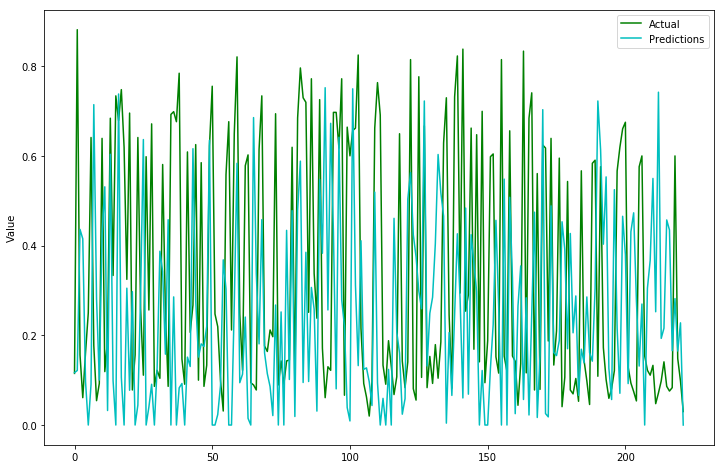

EMA 0.900- MSE: 3.971


/home/maggi/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1931323 but corresponding boolean dimension is 1960754


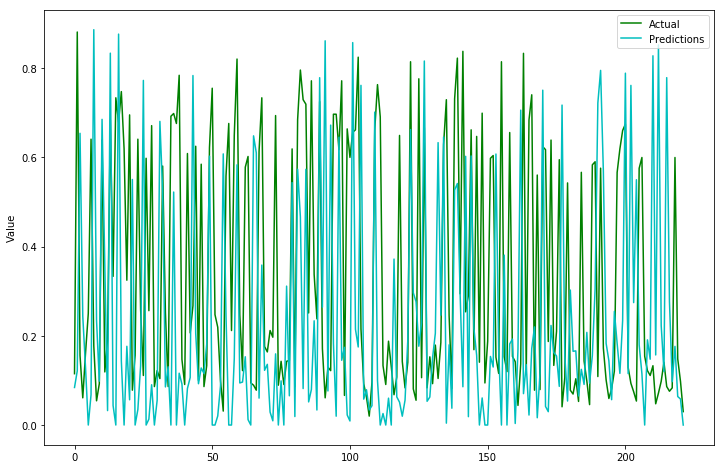

In [4]:
def evaluate_ema(df, alpha):
    feature = ts.grouped_lagged_ema(df[target].values, alpha, df['horse_name'].values)
    tr, feature_val = ts.split_data(pd.DataFrame(feature), date=df.index)
    error = ts.mape(val[target].values, feature_val.values)
    print('EMA %.3f' % alpha + '- MSE: %.3f' % error)
    return feature_val

feature_val = evaluate_ema(df, 0.4)
horse_ix = val['horse_name'].values == 'dvinsky'
ts.get_actual_vs_prediction_plot(val[target].values[horse_ix], feature_val.values[horse_ix])

feature_val = evaluate_ema(df, 0.9)
horse_ix = val['horse_name'].values == 'dvinsky'
ts.get_actual_vs_prediction_plot(val[target].values[horse_ix], feature_val.values[horse_ix])

In [5]:
def evaluate_rolling_mean(df, window):
    feature = ts.grouped_lagged_rolling_mean(df[target].values, alpha, df['horse_name'].values)
    tr, feature_val = ts.split_data(pd.DataFrame(feature), date=df.index)
    error = ts.mape(val[target].values, feature_val.values)
    print('EMA %.3f' % alpha + '- MSE: %.3f' % error)
    return feature_val

feature_val = evaluate_e(df, 0.4)
horse_ix = val['horse_name'].values == 'dvinsky'
ts.get_actual_vs_prediction_plot(val[target].values[horse_ix], feature_val.values[horse_ix])

feature_val = evaluate_ema(df, 0.9)
horse_ix = val['horse_name'].values == 'dvinsky'
ts.get_actual_vs_prediction_plot(val[target].values[horse_ix], feature_val.values[horse_ix])

NameError: name 'evaluate_e' is not defined